In [52]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import os
print(os.path.abspath('../'))
file_path = os.path.abspath('../Lab 14 Data Science Single Variate/')
print(file_path)
train = pd.read_csv(file_path+'/train_income_data_AAII.csv')
test = pd.read_csv(file_path+'/test_income_data_AAII.csv')


C:\Users\Adnan\Desktop\Unas & Umer\UNAS\PF\
C:\Users\Adnan\Desktop\Unas & Umer\UNAS\PF\Lab 14 Data Science Single Variate\


In [16]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [17]:
train.shape


(32561, 12)

In [18]:
train.dtypes


ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [36]:
categorical_var = train.dtypes.loc[train.dtypes=='int64'].index
print(categorical_var)
categorical_var1 = train.dtypes.loc[train.dtypes=='object'].index

print(categorical_var1)

Index(['ID', 'Age', 'Hours.Per.Week'], dtype='object')
Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [25]:
train[categorical_var].apply(lambda x:len(x.unique()))

ID                32561
Age                  73
Hours.Per.Week       94
dtype: int64

In [62]:
train['Age']

0        39
1        50
2        38
3        53
4        28
5        37
6        49
7        52
8        31
9        42
10       37
11       30
12       23
13       32
14       40
15       34
16       25
17       32
18       38
19       43
20       40
21       54
22       35
23       43
24       59
25       56
26       19
27       54
28       39
29       49
         ..
32531    30
32532    34
32533    54
32534    37
32535    22
32536    34
32537    30
32538    38
32539    71
32540    45
32541    41
32542    72
32543    45
32544    31
32545    39
32546    37
32547    43
32548    65
32549    43
32550    43
32551    32
32552    43
32553    32
32554    53
32555    22
32556    27
32557    40
32558    58
32559    22
32560    52
Name: Age, Length: 32561, dtype: int64

In [28]:
train['Hours.Per.Week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [37]:
train[categorical_var1].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [38]:
train['Education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [40]:
train['Education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

In [41]:
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [46]:
train['Native.Country'].value_counts()/len(train['Native.Country'])

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

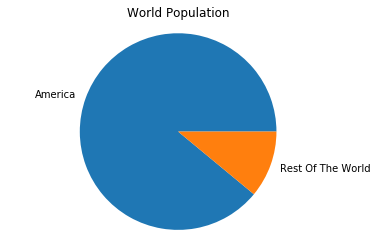

In [88]:
plt.pie([0.89,0.11],labels=['America','Rest Of The World'])
plt.title('World Population')
plt.axis("equal")
plt.show()

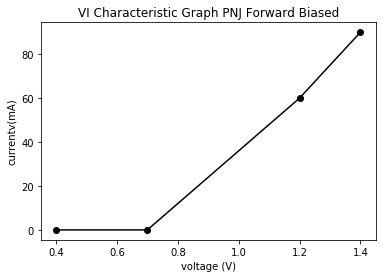

In [117]:
voltages = [0.4,0.7,1.2,1.4]
current = [0,0,60,90]
plt.plot(voltages,current,color='black',marker='o',linestyle = 'solid')
plt.title('VI Characteristic Graph PNJ Forward Biased')
plt.xlabel('voltage (V)')
plt.ylabel('currentv(mA)')
plt.show()
